Data loaded successfully.
Columns: ['CID', 'MolecularWeight', 'XLogP', 'InChIKey', 'CanonicalSMILES']
Data types:
 CID                  int64
MolecularWeight    float64
XLogP              float64
InChIKey            object
CanonicalSMILES     object
dtype: object
First few rows:
     CID  MolecularWeight  XLogP                     InChIKey  \
0  2244           180.16    1.2  BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
1  1983           151.16    0.5  RZVAJINKPMORJF-UHFFFAOYSA-N   
2   702            46.07   -0.1  LFQSCWFLJHTTHZ-UHFFFAOYSA-N   
3  6322           174.20   -4.2  ODKSFYDXXFIFQN-BYPYZUCNSA-N   
4  5957           507.18   -5.7  ZKHQWZAMYRWXGA-KQYNXXCUSA-N   

                                     CanonicalSMILES  
0                           CC(=O)OC1=CC=CC=C1C(=O)O  
1                              CC(=O)NC1=CC=C(C=C1)O  
2                                                CCO  
3                             C(CC(C(=O)O)N)CN=C(N)N  
4  C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...  
Miss

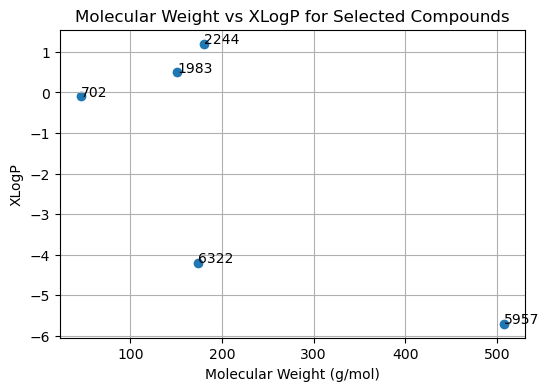

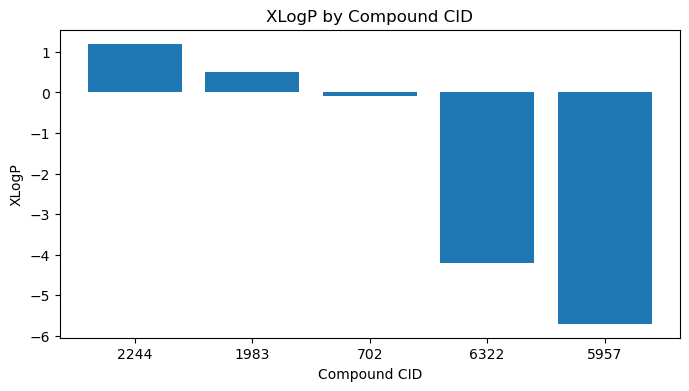

In [6]:
# 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load the dataset
# Note: PubChem returns property "XLogP" rather than "LogP"
url = (
    'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/' \
    '2244,1983,702,6322,5957/property/' \
    'MolecularWeight,XLogP,InChIKey,CanonicalSMILES/CSV'
)
try:
    df = pd.read_csv(url)
    print("Data loaded successfully.")
except Exception as e:
    print("Error loading data:", e)
    raise

# 3. Inspect the data
print("Columns:", df.columns.tolist())
print("Data types:\n", df.dtypes)
print("First few rows:\n", df.head())
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# 4. Data cleaning
# Drop rows with missing MolecularWeight or XLogP
clean_df = df.dropna(subset=['MolecularWeight', 'XLogP']).copy()
clean_df.reset_index(drop=True, inplace=True)

# 5. Visualization
# a) Molecular Weight vs XLogP
plt.figure(figsize=(6, 4))
plt.scatter(clean_df['MolecularWeight'], clean_df['XLogP'])
for i, cid in enumerate(clean_df['CID']):
    plt.annotate(str(cid), (
        clean_df.loc[i, 'MolecularWeight'],
        clean_df.loc[i, 'XLogP']
    ))
plt.xlabel('Molecular Weight (g/mol)')
plt.ylabel('XLogP')
plt.title('Molecular Weight vs XLogP for Selected Compounds')
plt.grid(True)
plt.show()

# b) XLogP vs Compound CID (bar chart)
plt.figure(figsize=(8, 4))
plt.bar(clean_df['CID'].astype(str), clean_df['XLogP'])
plt.xlabel('Compound CID')
plt.ylabel('XLogP')
plt.title('XLogP by Compound CID')
plt.show()

# Bonus: Implications for Solvent Selection
# - XLogP indicates lipophilicity; compounds with higher XLogP are more soluble in non-polar solvents, suggesting that solvents like dichloromethane or hexane may be appropriate for extraction or formulation.  
# - Molecular Weight can influence diffusion and solubility rates: higher weight compounds may require co-solvents or mixed solvent systems to ensure adequate solubility during processing.  
# - By comparing these properties, chemists can select solvent systems that balance polarity and solubility for synthesis, purification, and formulation stages.

